In [40]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,precision_score , recall_score, confusion_matrix 

In [41]:
# get input
df = pd.read_csv('diabetes.csv')
df.head()

,Unnamed: 0,Diabetes_binary,HighBP,High Cholesterol,Cholesterol Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical Activity,...,Any Health Care,No Doctor because of Cost,General Health,Mental Health,Physical Health,Difficulty Walking,Sex,Age,Education,Income
0,0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,...,1.0,0.0,Medium,5.0,30.0,0.0,male,4.0,Cat6,Cat8
1,1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,...,1.0,0.0,Medium,0.0,0.0,0.0,male,12.0,Cat6,Cat8
2,2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,...,1.0,0.0,High,0.0,10.0,0.0,male,13.0,Cat6,Cat8
3,3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Medium,0.0,3.0,0.0,male,11.0,Cat6,Cat8
4,4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Good,0.0,0.0,0.0,female,8.0,Cat5,Cat8


<div dir=rtl>
<h2><font color='Yellow'>مرحله پیش پردازش</h2>
<h3 ><font color='Green'>حذف داده های پوچ</font></h3>
<font color='white'>ابتدا به حذف داده های پوچ میپردازیم. برای اینکار داده هایی که Null هستند را تشخیص میدهیم. بعد از تشخیص آنها، چون داده ها به صورت باینری هستند، بهتر از با مد (داده ای که بیشتر تکرار را دارد) جایگزین کنیم.
سپس با چاپ کردن نتایج چک میکنیم که داده ای پوچ وجود نداشته باشد. همچنین ستون اول که به نام unknown است را نیز حذف میکنیم. و در کل ستون ها چک میکنیم اگر مقدار unknown وجود داشت آن سطر را حذف میکنیم.
</div>

In [42]:
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)
    df.drop(df.index[df[column] == 'Unknown'], inplace=True)
df = df.drop(['Unnamed: 0'], axis=1)
df.isnull().sum()

Diabetes_binary              0
HighBP                       0
High Cholesterol             0
Cholesterol Check            0
BMI                          0
Smoker                       0
Stroke                       0
HeartDiseaseorAttack         0
Physical Activity            0
Fruits                       0
Veggies                      0
Heavy Alcohol Consumption    0
Any Health Care              0
No Doctor because of Cost    0
General Health               0
Mental Health                0
Physical Health              0
Difficulty Walking           0
Sex                          0
Age                          0
Education                    0
Income                       0
dtype: int64

<div dir=rtl>
<h3 ><font color='Green'>تغییر نام ستون ها</font></h3>
در اینجا داده ها چک میکنیم و در صورت وجود داشتن فاصله بین آنها، با "_" تغییر میدهیم.
</div>

In [43]:
df.columns = df.columns.str.replace(' ', '_')
df

,Diabetes_binary,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,Fruits,...,Any_Health_Care,No_Doctor_because_of_Cost,General_Health,Mental_Health,Physical_Health,Difficulty_Walking,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,Medium,5.0,30.0,0.0,male,4.0,Cat6,Cat8
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Medium,0.0,0.0,0.0,male,12.0,Cat6,Cat8
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,High,0.0,10.0,0.0,male,13.0,Cat6,Cat8
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Medium,0.0,3.0,0.0,male,11.0,Cat6,Cat8
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Good,0.0,0.0,0.0,female,8.0,Cat5,Cat8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.0,0.0,0.0,female,6.0,Cat4,Cat1
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Good,0.0,0.0,1.0,male,10.0,Cat3,Cat6
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Very Low,15.0,0.0,1.0,female,13.0,Cat6,Cat4
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.0,0.0,1.0,female,11.0,Cat2,Cat4


<div dir=rtl>
<h3><font color='Green'>نرمالیزه کردن</font></h3>
سه تا ستون را نرمال میکنیم، یکی ستون BMI که به 5 دسته تقسیم میکنیم و دو ستون Physical Health و Mental Health را به کمک فرمول نرمال کردن min_max نرمال میکنیم.
</div>

In [44]:
# BMI (12, 98) --> (10, 90)
BMI_bin = pd.cut(x=df['BMI'], bins=[1, 20, 40, 60, 80, 100],
                    labels=['10', '30', '50',
                            '70', '90'])
df = df.drop('BMI', 1)
df.insert(5, 'BMI', BMI_bin)

# Physical Health 
# Mental Health 
scaler = preprocessing.MinMaxScaler()
df.loc[16:17,['Physical_Health','Mental Health']] = scaler.fit_transform(df.loc[16:17,['Physical_Health','Mental_Health']])

df.sample(10)


C:\Users\Delaram\AppData\Local\Temp\ipykernel_13000\318100214.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('BMI', 1)


,Diabetes_binary,HighBP,High_Cholesterol,Cholesterol_Check,Smoker,BMI,Stroke,HeartDiseaseorAttack,Physical_Activity,Fruits,...,No_Doctor_because_of_Cost,General_Health,Mental_Health,Physical_Health,Difficulty_Walking,Sex,Age,Education,Income,Mental Health
33109,0.0,0.0,0.0,0.0,0.0,30,0.0,0.0,1.0,1.0,...,0.0,Good,0.0,0.0,0.0,male,5.0,Cat6,Cat8,NaN
3655,0.0,0.0,0.0,1.0,1.0,30,0.0,0.0,1.0,1.0,...,0.0,Good,0.0,0.0,0.0,male,10.0,Cat5,Cat8,NaN
68486,1.0,1.0,1.0,1.0,1.0,30,0.0,1.0,1.0,0.0,...,1.0,Very Low,0.0,30.0,0.0,male,11.0,Cat5,Cat6,NaN
126,0.0,1.0,0.0,1.0,0.0,30,0.0,1.0,1.0,0.0,...,0.0,High,0.0,0.0,0.0,female,13.0,Cat4,Cat3,NaN
45564,1.0,0.0,1.0,1.0,0.0,30,0.0,0.0,1.0,0.0,...,0.0,Good,0.0,0.0,0.0,female,11.0,Cat6,Cat8,NaN
675,0.0,1.0,1.0,1.0,1.0,30,0.0,0.0,1.0,1.0,...,0.0,High,20.0,0.0,0.0,male,4.0,Cat4,Cat3,NaN
16667,0.0,0.0,0.0,1.0,0.0,10,0.0,0.0,0.0,1.0,...,0.0,High,10.0,0.0,0.0,female,6.0,Cat6,Cat7,NaN
13894,0.0,0.0,0.0,1.0,0.0,30,0.0,0.0,1.0,0.0,...,0.0,Medium,0.0,0.0,0.0,female,6.0,Cat4,Cat4,NaN
41023,1.0,0.0,1.0,1.0,1.0,50,0.0,0.0,0.0,1.0,...,0.0,Medium,3.0,10.0,0.0,female,6.0,Cat6,Cat6,NaN
38378,1.0,1.0,1.0,1.0,0.0,30,0.0,0.0,1.0,0.0,...,0.0,Good,0.0,0.0,1.0,male,7.0,Cat4,Cat8,NaN


<div dir=rtl>
<h3><font color='Green'>یافتن ویژگیهای دسته بندی شده</font></h3>
برای one hot encode از dummies استفاده میکنیم.
</div>

In [45]:
encoder_df = pd.get_dummies(df, prefix='General_Health',columns=['General_Health'])
encoder_df = pd.get_dummies(encoder_df, prefix='Sex',columns=['Sex'])
encoder_df = pd.get_dummies(encoder_df, prefix='Education',columns=['Education'])
df = pd.get_dummies(encoder_df, prefix='Income',columns=['Income'])

df.sample(10)

,Diabetes_binary,HighBP,High_Cholesterol,Cholesterol_Check,Smoker,BMI,Stroke,HeartDiseaseorAttack,Physical_Activity,Fruits,...,Education_Cat5,Education_Cat6,Income_Cat1,Income_Cat2,Income_Cat3,Income_Cat4,Income_Cat5,Income_Cat6,Income_Cat7,Income_Cat8
48024,1.0,1.0,1.0,1.0,0.0,30,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
9653,0.0,0.0,1.0,1.0,1.0,30,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
33250,0.0,0.0,1.0,1.0,1.0,30,0.0,0.0,0.0,1.0,...,1,0,0,0,0,1,0,0,0,0
14069,0.0,1.0,1.0,1.0,0.0,30,0.0,0.0,1.0,1.0,...,0,1,0,0,1,0,0,0,0,0
56300,1.0,0.0,1.0,1.0,1.0,30,0.0,0.0,0.0,1.0,...,0,0,0,1,0,0,0,0,0,0
59210,1.0,1.0,1.0,1.0,1.0,30,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,1,0,0
15520,0.0,0.0,0.0,1.0,0.0,30,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,1
5539,0.0,1.0,1.0,1.0,0.0,30,0.0,0.0,1.0,1.0,...,1,0,0,0,0,0,0,1,0,0
29035,0.0,1.0,0.0,1.0,1.0,30,0.0,0.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,1
4037,0.0,0.0,0.0,1.0,0.0,30,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,1,0,0


<div dir=rtl>
<h3><font color='Green'>جدا کردن داده های Train و Test</font></h3>
لیبل ها را از داده های اصلی جدا می کنیم.
</div>

In [46]:
labels = df.loc[:,['Diabetes_binary']].values
datas = df.iloc[:,1:].values

<div dir=rtl>
<h2><font color='Yellow'>مرحله ساخت مدل طبقه بند</h2>
<h3 ><font color='Green'>ساختن مدل</font></h3>
<font color='white'>
به کمک تابع tran_test_split داده های تست و آموزش را از هم جدا میکنیم تا در نهایت به مدل خود بدهیم.
</div>

In [47]:
xtrain, xtest, ytrain, ytest = train_test_split( datas, labels, test_size=0.2, random_state=7)
ytrain = ytrain.ravel()
ytest = ytest.ravel()
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(56552, 39) (14139, 39) (56552,) (14139,)


In [48]:
model = XGBClassifier(learning_rate=0.1, max_depth=4, n_estimators=200, subsample=0.5, colsample_bytree=1, random_seed=123, eval_metric='auc', verbosity=1)
model.fit(xtrain, ytrain)

[13:41:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "random_seed" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_seed=123,
              random_state=0, reg_alpha=0, ...)

In [49]:
# make predictions for test data
y_predict_train = model.predict(xtrain)
y_predict_test = model.predict(xtest)
# evaluate predictions
accuracy = accuracy_score(ytrain, y_predict_train)
print("Accuracy_train: %.2f%%" % (accuracy * 100.0))
recall = recall_score(ytrain, y_predict_train)
print("Recall_train: %.2f%%" % (recall * 100.0))
precision = precision_score(ytrain, y_predict_train)
print("Precision_train: %.2f%%" % (precision * 100.0))
accuracy = accuracy_score(ytest, y_predict_test)
print("Accuracy_test: %.2f%%" % (accuracy * 100.0))
recall = recall_score(ytest, y_predict_test)
print("Recall_test: %.2f%%" % (recall * 100.0))
precision = precision_score(ytest, y_predict_test)
print("Precision_test: %.2f%%" % (precision * 100.0))

Accuracy_train: 75.48%
Recall_train: 81.29%
Precision_train: 72.91%
Accuracy_test: 74.51%
Recall_test: 80.36%
Precision_test: 71.63%


<div dir=rtl>
<h3><font color='Green'>نتایج بدست آمده</font></h3>
با توجه به نتایج بدست آمده میبینیم که دقت این مدل برابر با 74.5 درصد است.</div>

In [50]:
def plot_confusion_matrix(y_test, y_pred,string_label):
    cm = confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(15,10))
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('Confusion Matrix '+ string_label)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

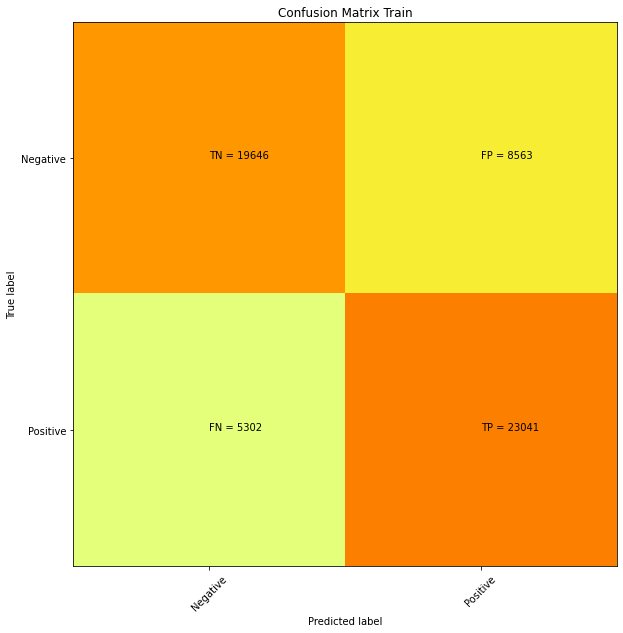

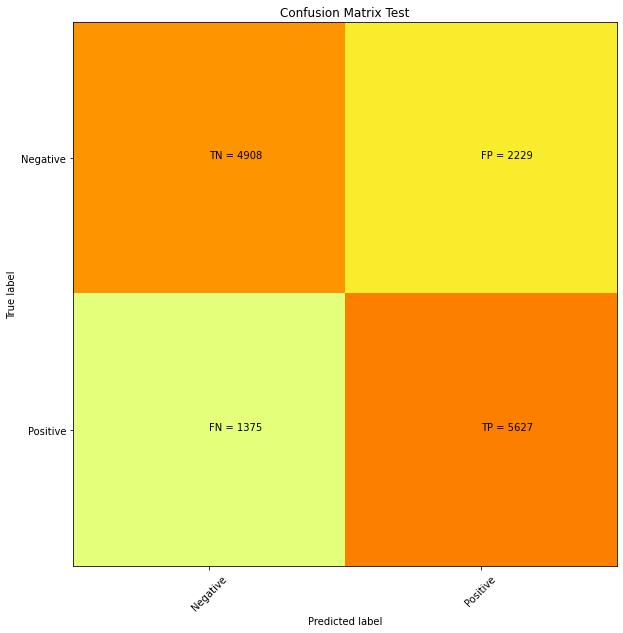

In [51]:
plot_confusion_matrix(ytrain, y_predict_train,'Train')
plot_confusion_matrix(ytest, y_predict_test,'Test')

<div dir=rtl>
<h2><font color='Yellow'>تنظیم پارامترها</h2>
<h3 ><font color='Green'>تنظیم پارامترها</font></h3>
<font color='white'>
</div>

In [52]:
def my_roc_auc_score(model, X, y): 
  return roc_auc_score(y, model.predict_proba(X)[:,1])

In [53]:
params = [{'learning_rate': [0.02, 0.05, 0.1, 0.3],
         'Max_depth': [2, 3, 4],
         'N_estimator': [100, 200, 300],
         'Colsample_bytree' : [0.8, 1]
         }]

xgbc = XGBClassifier(Eval_metric="auc" ,Subsample=0.5)
clf = GridSearchCV(xgbc , params , cv =3, scoring= my_roc_auc_score)
clf.fit(xtrain , ytrain)

[13:41:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Colsample_bytree", "Eval_metric", "Max_depth", "N_estimator", "Subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:42:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Colsample_bytree", "Eval_metric", "Max_depth", "N_estimator", "Subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:42:04] WARNING: C:/Users/Administr

GridSearchCV(cv=3,
             estimator=XGBClassifier(Eval_metric='auc', Subsample=0.5,
                                     base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learni...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [56]:
best_parameters = clf.best_params_
best_score = clf.best_score_
print(best_parameters)
print("Best Score: %.2f%%" % best_score)

{'Colsample_bytree': 0.8, 'Max_depth': 2, 'N_estimator': 100, 'learning_rate': 0.05}
Best Score: 0.82%


<div dir=rtl>
<h3 ><font color='Green'>آموزش مدل</font></h3>
<font color='white'>
مدل را با بهترین پارامتر های پیدا شده آموزش میدهیم
</div>

In [58]:
model2 = XGBClassifier(learning_rate=0.1 , Max_depth=2 ,N_estimator=100 ,Colsample_bytree=0.8)
model2.fit(xtrain, ytrain)

[14:31:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Colsample_bytree", "Max_depth", "N_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(Colsample_bytree=0.8, Max_depth=2, N_estimator=100,
              base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', ...)

In [59]:
# make predictions for test data
y_predict_train = model2.predict(xtrain)
y_predict_test = model2.predict(xtest)
# evaluate predictions
accuracy = accuracy_score(ytrain, y_predict_train)
print("Accuracy_train: %.2f%%" % (accuracy * 100.0))
recall = recall_score(ytrain, y_predict_train)
print("Recall_train: %.2f%%" % (recall * 100.0))
precision = precision_score(ytrain, y_predict_train)
print("Precision_train: %.2f%%" % (precision * 100.0))
accuracy = accuracy_score(ytest, y_predict_test)
print("Accuracy_test: %.2f%%" % (accuracy * 100.0))
recall = recall_score(ytest, y_predict_test)
print("Recall_test: %.2f%%" % (recall * 100.0))
precision = precision_score(ytest, y_predict_test)
print("Precision_test: %.2f%%" % (precision * 100.0))

Accuracy_train: 76.09%
Recall_train: 81.60%
Precision_train: 73.57%
Accuracy_test: 74.30%
Recall_test: 79.92%
Precision_test: 71.52%


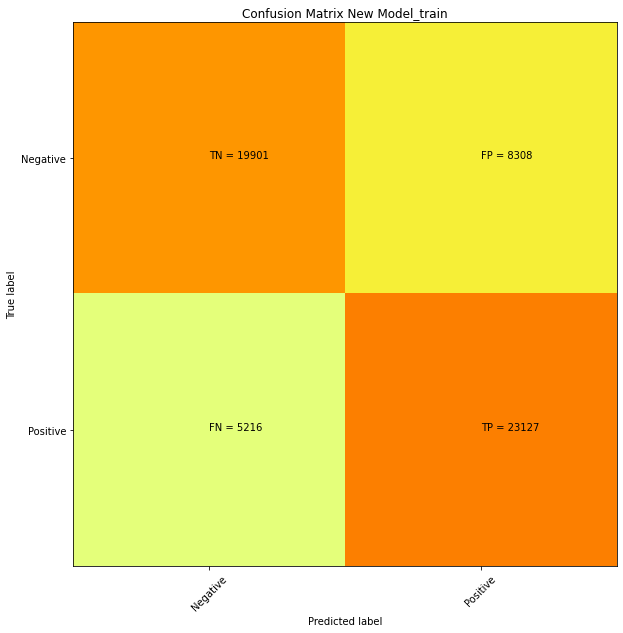

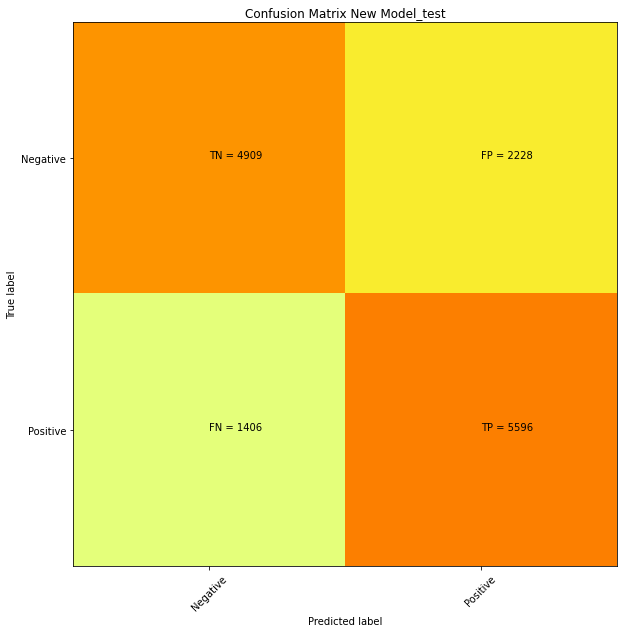

In [60]:
plot_confusion_matrix(ytrain, y_predict_train,'New Model_train')
plot_confusion_matrix(ytest, y_predict_test,'New Model_test')

In [62]:
clf.cv_results_

{'mean_fit_time': array([2.25905434, 2.18328333, 2.11480482, 2.10641535, 2.14959089,
        2.14100289, 2.04854528, 2.1356837 , 2.17718808, 2.18907515,
        2.12333926, 2.22315431, 2.16055338, 2.17280976, 2.17577545,
        2.09878047, 2.01370247, 1.93596903, 1.94944882, 2.04833738,
        2.15622886, 2.07027006, 2.02858019, 2.02151561, 2.08070032,
        2.07605712, 2.05169415, 2.10239291, 2.0849661 , 2.09176183,
        2.20275299, 2.02938565, 2.10074973, 2.07186913, 2.04945636,
        2.02621285, 2.09239189, 2.07610337, 2.04614766, 2.02527499,
        2.10242518, 2.07355936, 2.04509966, 2.02246221, 2.09292348,
        2.0695041 , 2.14498742, 2.02445698, 2.08583466, 2.18739955,
        2.07211669, 2.03301994, 2.07348053, 2.08185856, 2.07966487,
        2.07589738, 2.0942529 , 2.23363781, 2.11297592, 2.12459254,
        2.19024086, 2.12352753, 2.05232716, 2.01938327, 2.24099072,
        2.39694754, 2.09333301, 2.08233245, 2.1353333 , 2.10466639,
        2.11733238, 2.06400053]

<div dir=rtl>
<h3 ><font color='Green'>تصویر سازی تغییر هایپرپارامترها</font></h3>
<font color='white'>
مدل را با بهترین پارامتر های پیدا شده آموزش میدهیم
</div>

In [75]:
def plt_changes(p1,p2,p3,p4):
    overall= []
    for index, param in enumerate(clf.cv_results_['params']):
            if param[p2]==clf.best_params_[p2] and param[p3]==clf.best_params_[p3] and param[p4]==clf.best_params_[p4] :
                overall.append(clf.cv_results_['mean_test_score'][index])
    plt.plot(params[0][p1], overall)
    plt.title('Mean Score '+ p1)
    plt.xlabel(p1)
    plt.ylabel('Mean Score')
    plt.show()

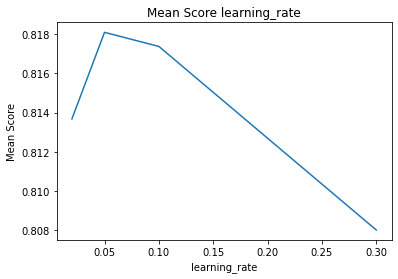

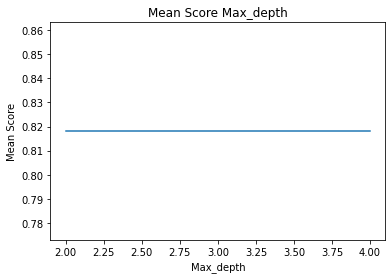

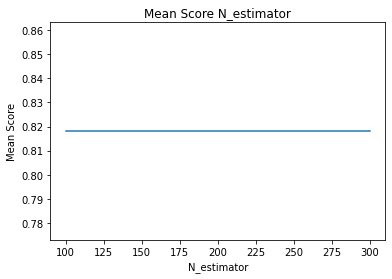

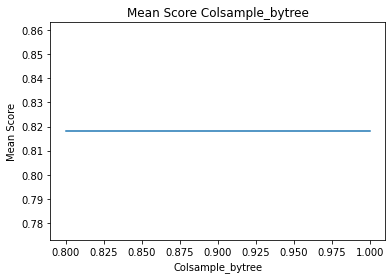

In [76]:
plt_changes('learning_rate', 'Max_depth', 'N_estimator', 'Colsample_bytree')
plt_changes('Max_depth', 'learning_rate', 'N_estimator', 'Colsample_bytree')
plt_changes('N_estimator', 'learning_rate', 'Max_depth', 'Colsample_bytree')
plt_changes('Colsample_bytree', 'learning_rate', 'Max_depth', 'N_estimator')

<div dir=rtl>
<h3 ><font color='Green'>نتیجه گیری</font></h3>
<font color='white'>
با توجه به نمودار های کشیده شده، تنها پارامتر learning rate است که بیشتری تاثیر را دارد، سایر پارامتر ها همانطور که مشاهده میشود نمودار افقی دارند بنابراین تاثیر چندانی در عملکرد مدل ندارند.
</div>